## 概要
- 摄像机几何
- 摄像机标定
- 特征点提取与匹配
- ransac 算法介绍
- 凸优化
- 3维重建基础
- 极几何
- 运动恢复结构
- 同时定位与建图系统
- 深度学习

In [5]:
# 摄像机内参
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def create_plane(n_points,xlim,ylim,elevation):
    x = np.linspace(xlim[0],xlim[1],n_points)
    y = np.linspace(ylim[0],ylim[1],n_points)
    xxs, yys = np.meshgrid(x,y)
    zzs = elevation * np.ones(shape=(n_points,n_points))
    plane_points = np.ones(shape=(3,n_points * n_points))
    c = 0
    for i in range(n_points):
        for j in range(n_points):
            xs = xxs[i,j]
            ys = yys[i,j]
            zs = zzs[i,j]
            plane_points[:,c] = np.array([xs,ys,zs])
            c += 1
    return plane_points

In [14]:
def create_image_grid(f,img_size):
    h,w = img_size
    xx, yy = np.meshgrid(range(-(h//2),w//2 + 1),range(-(h//2),w//2 + 1))
    z = np.ones(shape=img_size)* f
    return xx, yy, z

In [15]:
# 定义参数
n_points = 6
xlim = (-5,5)
ylim = (-5,5)
elevation = 5
img_size = (7,7)
f = 2

In [16]:
points = create_plane(n_points,xlim,ylim,elevation)
xx,yy,z = create_image_grid(f,img_size)

In [20]:
import pytransform3d.rotations as pr

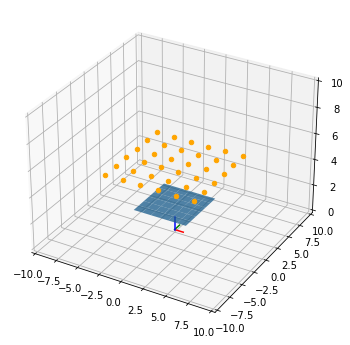

In [22]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

#plot image plane
ax.plot_surface(xx,yy,z,alpha=0.75)

ax.set(xlim=(-10,10),ylim=(-10,10),zlim=(0,10))
ax = pr.plot_basis(ax)

c = 0
for i in range(n_points):
    for j in range(n_points):
        point = points[:,c]
        ax.scatter(*point,color="orange")
        c +=1
        


## 摄像机外参

In [ ]:
t